In [84]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [85]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

print(f"Shape of training images : {train_image.shape}")
print(f"Shape of training labels : {train_label.shape}")
print(f"Shape of test images : {test_image.shape}")
print(f"Shape of test labels : {test_label.shape}")

Shape of training images : (60000, 28, 28)
Shape of training labels : (60000,)
Shape of test images : (10000, 28, 28)
Shape of test labels : (10000,)


Text(0.5, 1.0, 'digit 5')

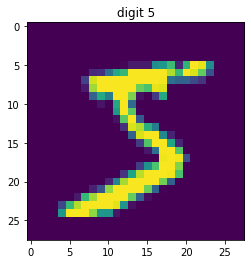

In [86]:
plt.imshow(train_image[0])
plt.title(f"digit {train_label[0]}")

In [87]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [88]:
train_image = train_image.reshape((-1, 28*28))
test_image = test_image.reshape((-1, 28*28))
train_image , test_image = train_image.astype('float32'), test_image.astype('float32')
train_image /= 255
test_image /= 255

train_label = to_categorical(train_label, num_classes=10)
test_label = to_categorical(test_label)

In [89]:
model.fit(train_image, train_label, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2673 - accuracy: 0.9221
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1171 - accuracy: 0.9653
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0819 - accuracy: 0.9754
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0644 - accuracy: 0.9805
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0516 - accuracy: 0.9846


In [90]:
loss , accuracy = model.evaluate(test_image, test_label)
print(f"The value of loss after evaluation :{loss:.3f} and the accuracy is {accuracy:.3f}")

313/313 [==============================] - 0s 750us/step - loss: 0.0659 - accuracy: 0.9795
The value of loss after evaluation :0.066 and the accuracy is 0.979
